# Mobile Network 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
dataset = pd.read_csv('dandi.csv')
X = dataset.iloc[:, 0:5].values
y = dataset.iloc[:, 5].values
dataset.head()

,RSRP,SNR,CQI,RSSI,RSRQ,STATE
0,-95,4,10,-80,-13,0
1,-95,2,8,-78,-13,1
2,-95,13,9,-80,-13,1
3,-95,13,9,-80,-13,1
4,-95,13,9,-80,-13,1


## EDA

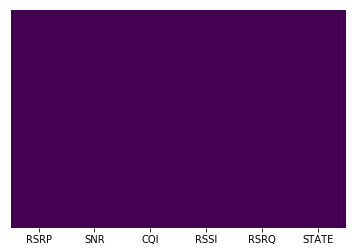

In [9]:
# Checkking for missing values
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False,cmap = 'viridis')

In [10]:
df = dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
RSRP     219 non-null int64
SNR      219 non-null int64
CQI      219 non-null int64
RSSI     219 non-null int64
RSRQ     219 non-null int64
STATE    219 non-null int64
dtypes: int64(6)
memory usage: 10.3 KB


In [11]:
df.describe()

,RSRP,SNR,CQI,RSSI,RSRQ,STATE
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,-102.917808,1.954338,7.333333,-86.109589,-14.164384,0.255708
std,4.667141,4.770678,1.730284,4.648848,1.323885,0.437258
min,-112.000000,-10.000000,1.000000,-94.000000,-18.000000,0.000000
25%,-106.000000,-1.000000,6.000000,-90.000000,-15.000000,0.000000
50%,-103.000000,2.000000,7.000000,-87.000000,-14.000000,0.000000
75%,-100.000000,4.000000,8.000000,-83.000000,-13.000000,1.000000
max,-91.000000,15.000000,12.000000,-74.000000,-11.000000,1.000000


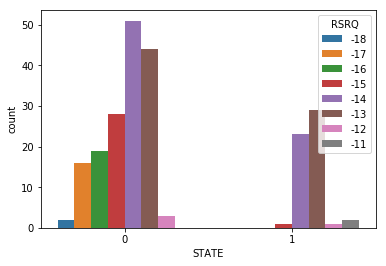

In [12]:
sns.countplot(x = "STATE", hue = "RSRQ", data = df)

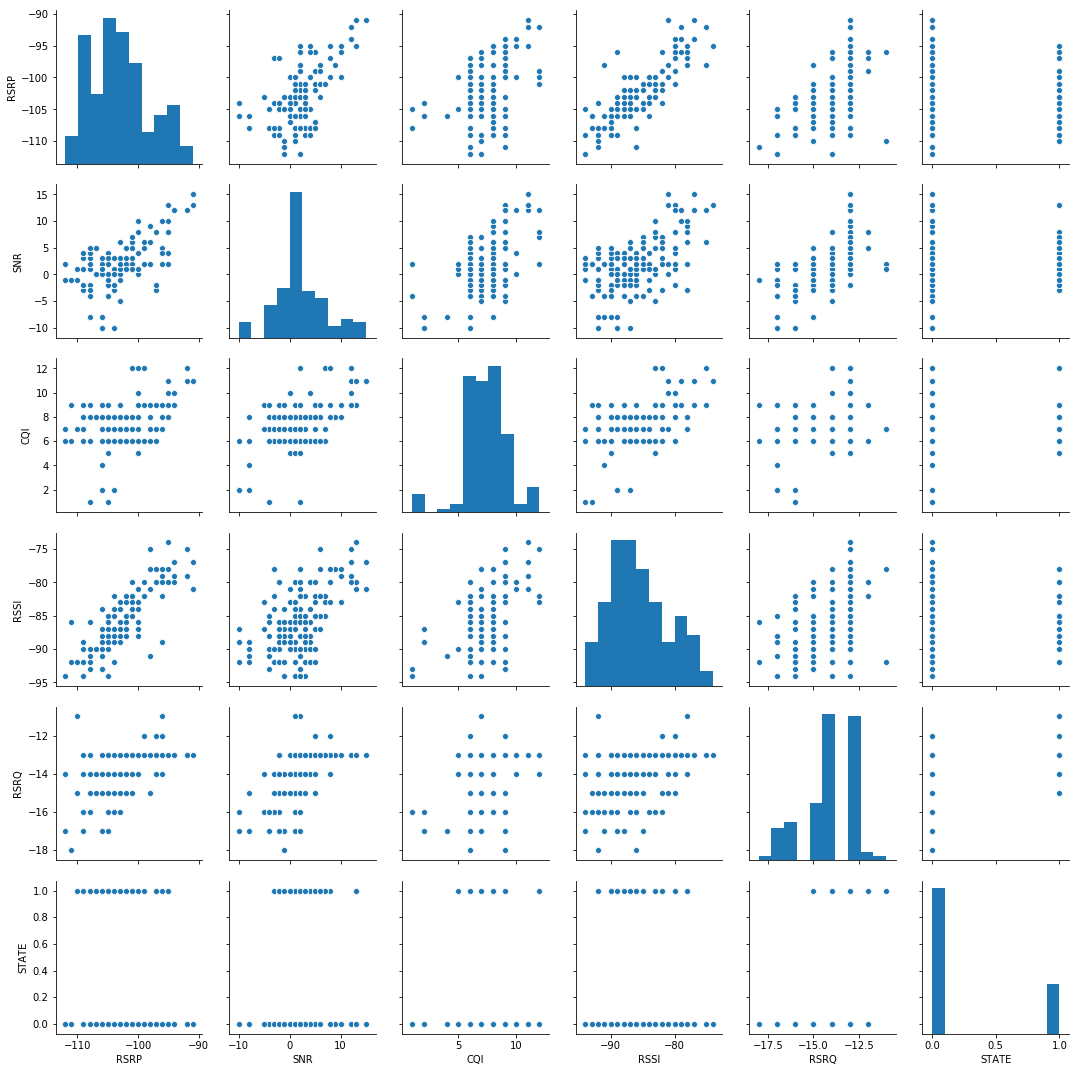

In [13]:
sns.pairplot(df)

## Linear Discriment analysis
- feature scaling the data
- spliting the dataset into train and test data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Logistic Regression
*Classification*

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
"""
    Confusion matrix
"""
print(confusion_matrix(y_test, y_pred))

[[14  3]
 [ 4  1]]


In [50]:
"""
Classification Report
"""
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.25      0.20      0.22         5

   micro avg       0.68      0.68      0.68        22
   macro avg       0.51      0.51      0.51        22
weighted avg       0.66      0.68      0.67        22



In [57]:
y_pred = classifier.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        print("Link Failure at ", X_test[i])

Link Failure at  [-95  10   8 -78 -13]
Link Failure at  [-109    1    7  -94  -17]
Link Failure at  [-109    1    7  -90  -16]
Link Failure at  [-95  13  11 -74 -13]
Link Failure at  [-95  13  11 -74 -13]
Link Failure at  [-94  12  10 -80 -13]
Link Failure at  [-103   -5    7  -87  -14]
Link Failure at  [-95   8   8 -78 -13]
Link Failure at  [-95  13   9 -80 -13]
Link Failure at  [-105    2    8  -86  -16]
Link Failure at  [-108    2    8  -90  -14]
Link Failure at  [-101    6    8  -85  -13]
Link Failure at  [-108    5    6  -90  -14]
Link Failure at  [-106  -10    2  -89  -17]
Link Failure at  [-108   -2    8  -90  -15]
Link Failure at  [-112   -1    7  -94  -17]
Link Failure at  [-100    4    8  -84  -13]
Link Failure at  [-102    1    6  -83  -14]


# SVM
- Support Vector Machine

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(X_train, y_train)

C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
prediction = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, prediction))

[[12  5]
 [ 1  4]]


In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.44      0.80      0.57         5

   micro avg       0.73      0.73      0.73        22
   macro avg       0.68      0.75      0.69        22
weighted avg       0.81      0.73      0.75        22

